Огородников Николай Александрович, группа 191-321

# Task 3

## Neural networks

### Цель работы

Научиться моделировать нейронные сети типа перцептрон.
Найти достаточное количество скрытых слоев и количество нейронов в сети для обучения в задачах аппроксимации математических функций.
Произвести оценку полученных результатов на тестовой выборке.

## Задание 1.

Смоделировать и обучить нейросеть, аппроксимирующую функцию $y = \sin\left(\[\frac{x}{2}\]\right)$ на отрезке от 0 до 10. Изобразить точки обучающей выборки на графике. Произвести оценку полученных результатов на тестовой выборке.

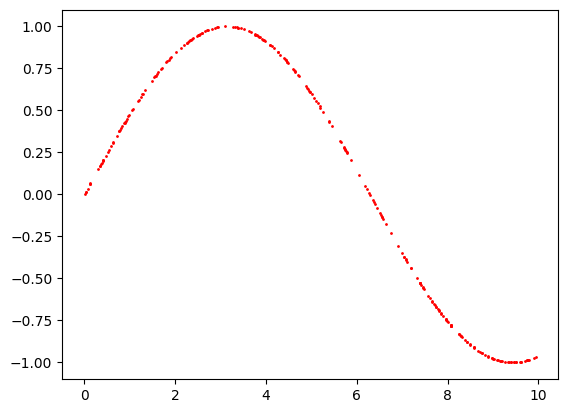

In [69]:
import matplotlib.pyplot as plt
import tensorflow as tf

# создание обучающей выборки
x_train = tf.random.uniform(minval=0, maxval=10, shape=(256, 1))
y_train = tf.sin(x_train / 2)

# вывод точек обучающей выборки
plt.scatter(x_train, y_train, s=1, c='r')
plt.show()

In [70]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# модель полносвязного слоя нейронной сети
class DenseNN(tf.Module):
    # конструктор
    # outputs - количество нейронов (выходов) с полносвязного слоя
    def __init__(self, outputs):
        super().__init__()  # конструктор базового класса
        self.outputs = outputs  # сохранение количества нейронов
        self.fl_init = False  # флаг проведения инициализации

    # делает из класса функтор
    # x - вектор входных параметров
    def __call__(self, x):
        # начальные значения весовых параметров
        if not self.fl_init:
            # скрытые слои
            # случайная нормальная величина
            self.w1 = tf.Variable(tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name="w1"))
            self.b1 = tf.Variable(tf.zeros([self.outputs], dtype=tf.float32, name="b1"))  # вектор смещения

            # self.w2 = tf.Variable(tf.random.truncated_normal((self.outputs, self.outputs), stddev=0.1, name="w2"))
            # self.b2 = tf.Variable(tf.zeros([self.outputs], dtype=tf.float32, name="b2"))
            #
            # self.w3 = tf.Variable(tf.random.truncated_normal((self.outputs, self.outputs), stddev=0.1, name="w3"))
            # self.b3 = tf.Variable(tf.zeros([self.outputs], dtype=tf.float32, name="b3"))

            # выходной слой
            self.w4 = tf.Variable(tf.random.truncated_normal((self.outputs, 1), stddev=0.1, name="w4"))
            self.b4 = tf.Variable(tf.zeros([1], dtype=tf.float32, name="b4"))

            # предотвращаем повторную инициализацию
            self.fl_init = True

        # вычисляем выходное значение
        # для скрытого слоя - гиперболический тангенс
        # для выходного - линейная
        # y = tf.nn.tanh(
        #     tf.nn.tanh(tf.nn.tanh(x @ self.w1 + self.b1) @ self.w2 + self.b2) @ self.w3 + self.b3) @ self.w4 + self.b4
        y = tf.nn.tanh(x @ self.w1 + self.b1) @ self.w4 + self.b4
        return y

In [71]:
model = DenseNN(4)

# функция потерь
loss = lambda x, y: tf.reduce_mean(tf.square(x - y))  # квадрат рассогласования между требуемым и получившимся выходом
opt = tf.optimizers.Adam(learning_rate=0.01)  # оптимизатор для градиентного спуска

EPOCHS = 32  # количество итераций алгоритма
for n in range(EPOCHS):
    # перебор обучающего множества
    for x, y in zip(x_train, y_train):
        x = tf.expand_dims(x, axis=0)  # преобразование в матрицу 1 на количество наблюдений
        y = tf.constant(y, shape=(1, 1))  # преобразование в матрицу 1 на 1

        with tf.GradientTape() as tape:
            f_loss = loss(y, model(x))

        # вычисление градиентов по всем обучаемым параметрам модели
        grads = tape.gradient(f_loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))

    print(EPOCHS - n, ' ', f_loss.numpy())

# print(model.trainable_variables)

32   0.23077697
31   0.06743229
30   0.0006271882
29   0.014892955
28   0.017793642
27   0.01401768
26   0.009422928
25   0.0054471744
24   0.0025029643
23   0.00074566755
22   5.7951467e-05
21   5.556801e-05
20   0.00030679206
19   0.0005484004
18   0.00070644444
17   0.0008010209
16   0.0008680574
15   0.00093177374
14   0.0010047852
13   0.0010930158
12   0.0011959985
11   0.0013047791
10   0.0014025974
9   0.0014746282
8   0.0015221745
7   0.0015637645
6   0.0016212577
5   0.0016929084
4   0.0017003915
3   0.0014276382
2   0.0006414915
1   1.6929182e-05


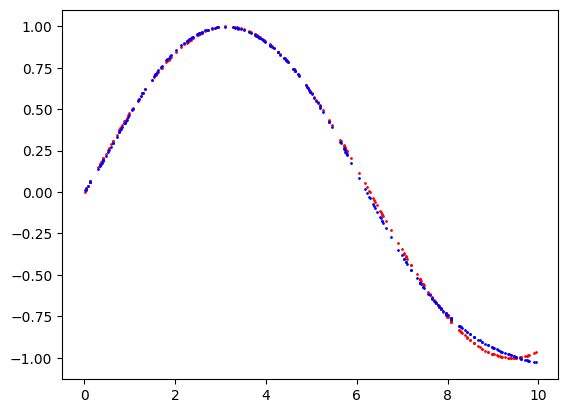

In [72]:
y_test = model(x_train)

# accuracy = tf.keras.metrics.Accuracy()
# accuracy.update_state(y_train, y_test)

# print(y_train.numpy())
# print(y_test.numpy())
# print('Mean accuracy: %.3f%%\n' % (accuracy.result().numpy() * 100))
# print('Confusion matrix SKlearn:\n', matrix, '\n')

plt.scatter(x_train, y_train, s=1, c='r')
plt.scatter(x_train, y_test, s=1, c='b')
plt.show()

### Вывод


В рамках задания была смоделирована нейронная сеть типа перцептрон, изучен принципы её работы, найдено достаточное количество скрытых слоев и количество нейронов в сети для обучения в задачах аппроксимации математической функции $y = \sin\left(\[\frac{x}{2}\]\right)$ и проведена оценка качества модели, с помощью вывода графика аппроксимируемой функции и графика обученной нейронной сети.

В ходе решения была подготовлена искусственная выборка для проверки алгоритма, состоящая из 256 случайных распределенных значений функции $y = \sin\left(\[\frac{x}{2}\]\right)$. Далее была построена модель нейронной сети, состоящей из 1 скрытого слоя и 1 выходного слоя, активационная функция скрытого слоя - гиперболический тангенс, выходного - линейная. После был реализован алгоритм обучения с оптимизатором Adam, за его вычислительную эффективность. Процесс обучения для модели из 4 нейронов состоял из 16 эпох (итераций). Затем с помощью обученной модели был построен график с результатом аппроксимации. При визуальном сравнении графики имеют сходство.

Подбором было обнаружено, что добавление дополнительных слоев в нейронную сеть, увеличение количества нейронов, эпох, размера обучающей выборки не давало заметного улучшения результата, однако увеличивало время обучения.